In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import h3
import shapely

In [ ]:
# hex_location_dict = {
#     "891126d33bbffff": "Helsinki central",
#     "891126d339bffff": "Kampi",
#     "891126d300bffff": "Roholahti",
#     "891126d04c3ffff": "Pasila",
#     "891126d3307ffff": "Uni of Helsinki",
#     "891126d0603ffff": "Sornas",
#     "891126d225bffff": "Meilahden sairaala (Meilahti hospital)",
#     "89089968aabffff": "Lepavara",
#     "890899698d7ffff": "Tapiola",
#     "89089969523ffff": "Iso omena"
# }


In [2]:
import requests
import time
from h3 import h3

# List of destination names
destinations = [
    "Helsinki Central Station",
    "Kamppi, Helsinki",
    "Ruoholahti, Helsinki",
    "Pasila railway station, Helsinki",
    "University of Helsinki metro station, Helsinki",
    "Sörnäinen, Helsinki",
    "Meilahden sairaala, Helsinki",
    "Leppävaara, Espoo",
    "Tapiola, Espoo",
    "Iso Omena, Espoo"
]


# Base URL for Nominatim
url = "https://nominatim.openstreetmap.org/search"

# List to hold the H3 hex values
destinations_hex_value = []

# File to write hex values
with open("address.txt", "w") as f:
    for name in destinations:
        params = {
            "q": name,
            "format": "json",
            "addressdetails": 1,
            "limit": 1
        }
        response = requests.get(url, params=params, headers={"User-Agent": "location-fetcher/1.0"})
        data = response.json()

        if data:
            lat = float(data[0]["lat"])
            lon = float(data[0]["lon"])
            h3_index = h3.geo_to_h3(lat, lon, resolution=9)  # Adjust resolution if needed
            destinations_hex_value.append(h3_index)
            f.write(f"{h3_index}\n")
        else:
            print(f"No location found for: {name}")
            destinations_hex_value.append(None)
            f.write("None\n")

        time.sleep(1)

print("H3 indices written to address.txt")


H3 indices written to address.txt


In [3]:
import pandas as pd

# Load your CSV data
data = pd.read_csv(r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\Locomizer_latest_april_03.csv")

destinations_hex_value = [
    "891126d33bbffff",
    "891126d339bffff",
    "891126d300bffff",
    "891126d04c3ffff",
    "891126d3307ffff",
    "891126d0603ffff",
    "891126d225bffff",
    "89089968aabffff",
    "890899698d7ffff",
    "89089969523ffff"
]

# Filter rows where ORIGIN_Municipality == "Espoo" and DESTINATION_CODE9 is in the list
filtered_data = data[
    (data['ORIGIN_Municipality'].isin(['Espoo', 'Kauniainen'])) &
    (data['DESTINATION_CODE9'].isin(destinations_hex_value))
]


# Check for duplicate values in ORIGIN_CODE9
duplicates = filtered_data['ORIGIN_CODE9'].duplicated().sum()

# Optionally print duplicates
# if duplicates > 0:
#     print(f"Warning: There are {duplicates} duplicates in the 'ORIGIN_CODE9' column.")
#     print(filtered_data[filtered_data['ORIGIN_CODE9'].duplicated(keep=False)])
# else:
#     print("No duplicates found in the 'ORIGIN_CODE9' column.")

# Display the filtered data
filtered_data.head()


,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,ORIGIN_Municipality,DESTINATION_Municipality,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer
129,129,89089961333ffff,891126d300bffff,78.00,27594.42,51.43,4289.28,28056,74.5,1526.52,Espoo,Helsinki,POLYGON ((24.645161161487014 60.26121028218264...,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74
216,216,89089961357ffff,891126d225bffff,83.00,21378.69,41.17,3323.10,21992,64.6,1138.23,Espoo,Helsinki,POLYGON ((24.64147730438574 60.250688267551496...,POLYGON ((24.903748715253034 60.19038155073539...,0.85,0.12,71,10,235.94,11.38
228,228,89089961357ffff,891126d300bffff,81.00,26836.82,51.43,4171.52,27750,84.5,1446.74,Espoo,Helsinki,POLYGON ((24.64147730438574 60.250688267551496...,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,69,9,287.83,13.02
236,236,89089961357ffff,891126d3307ffff,166.00,26617.03,59.67,4137.35,26505,85.3,1347.34,Espoo,Helsinki,POLYGON ((24.64147730438574 60.250688267551496...,"POLYGON ((24.94537134122844 60.16984093993103,...",0.85,0.12,142,19,587.50,25.60
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,Espoo,Espoo,POLYGON ((24.648814937134176 60.25373794707187...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08


In [4]:
filtered_data.shape

(827, 20)

In [7]:
# Helsinki_Central_Railway_Station = shapely.Point(24.941521, 60.170666)
# destinations = gpd.GeoDataFrame(
#         {
#             "id": [1],
#             "geometry": [Helsinki_Central_Railway_Station]
#         },
#         crs="EPSG:4326",
# )


import geopandas as gpd
from shapely.geometry import Point
import requests
import time

# Dictionary of named destinations
destination_names = {
    "Helsinki_Central_Railway_Station": "Helsinki central railway station, Helsinki",
    "Kampi": "Kamppi, Helsinki",
    "Roholahti": "Ruoholahti, Helsinki",
    "Pasila": "Pasila railway station, Helsinki",
    "Uni_of_Helsinki": "University of Helsinki metro station, Helsinki",
    "Sornas": "Sörnäinen, Helsinki",
    "Meilahti_Hospital": "Meilahden sairaala, Helsinki",
    "Leppavaara": "Leppävaara, Espoo",
    "Tapiola": "Tapiola, Espoo",
    "Iso_Omena": "Iso Omena, Espoo"
}

# Function to geocode using Nominatim
def geocode_place(place_name):
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": place_name,
        "format": "json",
        "limit": 1
    }
    response = requests.get(url, params=params, headers={"User-Agent": "geo-fetcher"})
    data = response.json()
    if data:
        return float(data[0]["lon"]), float(data[0]["lat"])
    else:
        return None

# Build the dictionary of shapely Points
destination_points = {}
for name, query in destination_names.items():
    coords = geocode_place(query)
    if coords:
        destination_points[name] = Point(coords)
    else:
        print(f"Location not found: {query}")
    time.sleep(1)  # Respect Nominatim rate limits

# Create GeoDataFrame
destinations_gdf = gpd.GeoDataFrame(
    {"id": list(range(1, len(destination_points)+1))},
    geometry=list(destination_points.values()),
    crs="EPSG:4326"
)

print(destinations_gdf)


   id                   geometry
0   1  POINT (24.94059 60.17155)
1   2  POINT (24.93171 60.16763)
2   3  POINT (24.91362 60.16224)
3   4  POINT (24.93331 60.19888)
4   5   POINT (24.9486 60.17276)
5   6  POINT (24.96441 60.18388)
6   7  POINT (24.90641 60.18822)
7   8  POINT (24.81414 60.21967)
8   9  POINT (24.80317 60.17664)
9  10  POINT (24.73834 60.16129)


In [4]:
# dest_y, dest_x =   60.1622494, 24.9082137
# destination_Point = Point(dest_x, dest_y)
# destination_Point_df = gpd.GeoDataFrame({"geometry": [destination_Point], 
#                                          "name": "Destination", 
#                                          "id": [1]}, 
#                                         index=[0], 
#                                         crs="epsg:4326")

In [8]:
from h3 import h3

# Function to convert H3 index to lat-lon
def h3_to_latlon(h3_index):
    lat, lon = h3.h3_to_geo(h3_index)
    return lat, lon

# Create a copy of the filtered DataFrame
filtered_data = filtered_data.copy()

# Convert H3 codes to lat-lon
filtered_data['orig_lat'], filtered_data['orig_lon'] = zip(*filtered_data['ORIGIN_CODE9'].map(h3_to_latlon))


# Show the updated data
filtered_data.head()


,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,...,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
129,129,89089961333ffff,891126d300bffff,78.00,27594.42,51.43,4289.28,28056,74.5,1526.52,...,POLYGON ((24.645161161487014 60.26121028218264...,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
216,216,89089961357ffff,891126d225bffff,83.00,21378.69,41.17,3323.10,21992,64.6,1138.23,...,POLYGON ((24.64147730438574 60.250688267551496...,POLYGON ((24.903748715253034 60.19038155073539...,0.85,0.12,71,10,235.94,11.38,60.251705,24.643923
228,228,89089961357ffff,891126d300bffff,81.00,26836.82,51.43,4171.52,27750,84.5,1446.74,...,POLYGON ((24.64147730438574 60.250688267551496...,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,69,9,287.83,13.02,60.251705,24.643923
236,236,89089961357ffff,891126d3307ffff,166.00,26617.03,59.67,4137.35,26505,85.3,1347.34,...,POLYGON ((24.64147730438574 60.250688267551496...,"POLYGON ((24.94537134122844 60.16984093993103,...",0.85,0.12,142,19,587.50,25.60,60.251705,24.643923
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,...,POLYGON ((24.648814937134176 60.25373794707187...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261


In [9]:
import geopandas as gpd
from shapely.geometry import Point

# Initialize empty lists to store individual origin and destination GeoDataFrames
origin_Point_df_list = []


# Loop over the filtered data and create GeoDataFrames for each origin and destination
for index, row in filtered_data.iterrows():
    # Origin point
    orig_y, orig_x = row['orig_lat'], row['orig_lon']
    origin_Point = Point(orig_x, orig_y)
    origin_Point_df = gpd.GeoDataFrame({
        "geometry": [origin_Point], 
        "name": ["Origin"], 
        "id": [index]}, 
        index=[index], 
        crs="epsg:4326")
    
    # Add the origin GeoDataFrame to the list
    origin_Point_df_list.append(origin_Point_df)
    
    # # Destination point
    # dest_y, dest_x = row['dest_lat'], row['dest_lon']
    # destination_Point = Point(dest_x, dest_y)
    # destination_Point_df = gpd.GeoDataFrame({
    #     "geometry": [destination_Point], 
    #     "name": ["Destination"], 
    #     "id": [index]}, 
    #     index=[index], 
    #     crs="epsg:4326")
    
    # # Add the destination GeoDataFrame to the list
    # destination_Point_df_list.append(destination_Point_df)

# Now concatenate the lists of GeoDataFrames to create final GeoDataFrames for origin and destination
origin_gdf = gpd.GeoDataFrame(pd.concat(origin_Point_df_list, ignore_index=True), crs="epsg:4326")
# destination_gdf = gpd.GeoDataFrame(pd.concat(destination_Point_df_list, ignore_index=True), crs="epsg:4326")

# Add an 'index' column to both GeoDataFrames
origin_gdf['index'] = origin_gdf.index
# destination_gdf['index'] = destination_gdf.index

# # Check for duplicate IDs and reset them if necessary
# if not origin_gdf['id'].is_unique:
#     print("Warning: Duplicate IDs in origin_gdf.")
#     origin_gdf = origin_gdf.reset_index(drop=True)
#     origin_gdf['id'] = origin_gdf.index

# if not destination_gdf['id'].is_unique:
#     print("Warning: Duplicate IDs in destination_gdf.")
#     destination_gdf = destination_gdf.reset_index(drop=True)
#     destination_gdf['id'] = destination_gdf.index

# Now you can check the updated GeoDataFrames
origin_Point_df.head()


,geometry,name,id
100612,POINT (24.83301 60.21505),Origin,100612


In [10]:
origin_gdf
# origin_gdf.explore(max_zoom=13, color="red", marker_kwds={"radius": 12})

,geometry,name,id,index
0,POINT (24.64761 60.26223),Origin,129,0
1,POINT (24.64392 60.2517),Origin,216,1
2,POINT (24.64392 60.2517),Origin,228,2
3,POINT (24.64392 60.2517),Origin,236,3
4,POINT (24.65126 60.25475),Origin,287,4
...,...,...,...,...
822,POINT (24.83523 60.21777),Origin,100504,822
823,POINT (24.84037 60.21809),Origin,100536,823
824,POINT (24.83009 60.21744),Origin,100578,824
825,POINT (24.83009 60.21744),Origin,100586,825


In [11]:
# Create GeoDataFrame for the origins
origin_gdf_new = gpd.GeoDataFrame(filtered_data, 
                               geometry=[Point(lon, lat) for lon, lat in zip(filtered_data['orig_lon'], filtered_data['orig_lat'])],
                               crs="epsg:4326")

In [12]:
origin_gdf_new

,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,...,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
129,129,89089961333ffff,891126d300bffff,78.00,27594.42,51.43,4289.28,28056,74.5,1526.52,...,POINT (24.64761 60.26223),POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
216,216,89089961357ffff,891126d225bffff,83.00,21378.69,41.17,3323.10,21992,64.6,1138.23,...,POINT (24.64392 60.2517),POLYGON ((24.903748715253034 60.19038155073539...,0.85,0.12,71,10,235.94,11.38,60.251705,24.643923
228,228,89089961357ffff,891126d300bffff,81.00,26836.82,51.43,4171.52,27750,84.5,1446.74,...,POINT (24.64392 60.2517),POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,69,9,287.83,13.02,60.251705,24.643923
236,236,89089961357ffff,891126d3307ffff,166.00,26617.03,59.67,4137.35,26505,85.3,1347.34,...,POINT (24.64392 60.2517),"POLYGON ((24.94537134122844 60.16984093993103,...",0.85,0.12,142,19,587.50,25.60,60.251705,24.643923
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,...,POINT (24.65126 60.25475),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100504,100504,891126d2483ffff,89089968aabffff,83.00,2328.77,11.35,361.98,1776,13.7,74.42,...,POINT (24.83523 60.21777),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,38,9,13.76,0.67,60.217766,24.835235
100536,100536,891126d248fffff,89089968aabffff,94.43,3060.33,13.29,475.70,2467,16.8,43.18,...,POINT (24.84037 60.21809),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.23,43,21,20.46,0.91,60.218093,24.840375
100578,100578,891126d2493ffff,891126d225bffff,75.00,7468.08,21.47,1160.84,7629,33.4,372.92,...,POINT (24.83009 60.21744),POLYGON ((24.903748715253034 60.19038155073539...,0.57,0.30,43,22,49.92,8.20,60.217438,24.830095
100586,100586,891126d2493ffff,891126d300bffff,76.00,14999.05,37.13,2331.45,12322,45.8,270.05,...,POINT (24.83009 60.21744),POLYGON ((24.910089160285608 60.16247858933870...,0.69,0.23,53,17,123.57,4.59,60.217438,24.830095


In [13]:
# Plot the origin and destination
m = origin_gdf_new.explore(color="red", marker_kwds={"radius": 12}, zoom_start=12)
m = destinations_gdf.explore(m=m, color="black", marker_kwds={"radius": 12})
m

In [14]:
destinations_gdf

,id,geometry
0,1,POINT (24.94059 60.17155)
1,2,POINT (24.93171 60.16763)
2,3,POINT (24.91362 60.16224)
3,4,POINT (24.93331 60.19888)
4,5,POINT (24.9486 60.17276)
5,6,POINT (24.96441 60.18388)
6,7,POINT (24.90641 60.18822)
7,8,POINT (24.81414 60.21967)
8,9,POINT (24.80317 60.17664)
9,10,POINT (24.73834 60.16129)


In [16]:
import sys
sys.argv.append([
    "--r5-classpath", 
    "https://github.com/DigitalGeographyLab/r5/releases/download/v6.9-post16-g1054c1e-20230619/r5-v6.9-post16-g1054c1e-20230619-all.jar"
])

import pandas as pd
import geopandas as gpd
import osmnx as ox
import r5py
from r5py import TransportNetwork
import pickle
import os
import r5py.sampledata.helsinki

In [17]:
# Get the filepaths to sample data (OSM and GTFS)

helsinki_osm_new = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\2017\Helsinki.osm.pbf"

# helsinki_gtfs_new = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\transfer_feed\gtfs 20230428.zip"
helsinki_gtfs_2017 = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\transfer_feed\gtfs_12NOV2017.zip"

transport_network = TransportNetwork(
    # OSM data
    helsinki_osm_new,
    
    # A list of GTFS file(s)
    [
        helsinki_gtfs_2017
    ]
)

In [18]:
import datetime
import time
from r5py import TravelTimeMatrix, TransportMode

# Measure start time
start_time = time.time()

# Initialize the tool
travel_time_matrix_computer = TravelTimeMatrix(
    transport_network,
    origins=origin_gdf,
    destinations=destinations_gdf,
    departure=datetime.datetime(2017, 11, 9, 8, 30),
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
    departure_time_window=datetime.timedelta(minutes=60)
)

# Measure end time
end_time = time.time()
execution_time = end_time - start_time

print(f"TravelTimeMatrix computation took {execution_time:.2f} seconds.")


C:\Users\rajaa\.conda\envs\msthesis\Lib\site-packages\r5py\r5\regional_task.py:227: RuntimeWarning: Departure time 2017-11-09 08:30:00 is outside of the time range covered by currently loaded GTFS data sets.
  warnings.warn(


TravelTimeMatrix computation took 112.85 seconds.


In [19]:
travel_time_matrix_computer.head()

,from_id,to_id,travel_time
0,129,1,82.0
1,129,2,83.0
2,129,3,83.0
3,129,4,74.0
4,129,5,89.0


In [20]:

# Check for invalid geometries in origin_gdf
print(f"Valid geometries in origin_gdf : {len(origin_gdf)}/ ", origin_gdf.is_valid.sum())


Valid geometries in origin_gdf : 827/  827


In [21]:
origin_gdf_test = origin_gdf[10:20]
origin_gdf_test

,geometry,name,id,index
10,POINT (24.74048 60.19112),Origin,1107,10
11,POINT (24.74119 60.18603),Origin,1143,11
12,POINT (24.74119 60.18603),Origin,1146,12
13,POINT (24.74119 60.18603),Origin,1153,13
14,POINT (24.7434 60.18874),Origin,1175,14
15,POINT (24.71192 60.19185),Origin,1248,15
16,POINT (24.709 60.19423),Origin,1460,16
17,POINT (24.74278 60.21184),Origin,1717,17
18,POINT (24.74278 60.21184),Origin,1761,18
19,POINT (24.73835 60.20641),Origin,1893,19


In [22]:
import datetime
import time
import geopandas as gpd
import warnings
from r5py import DetailedItineraries, TransportMode

# Start timing
start_time = time.time()

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Initialize the Detailed Itineraries Computer object
    detailed_itineraries_computer = DetailedItineraries(
        transport_network,
        origins=origin_gdf,
        destinations=destinations_gdf,
        departure=datetime.datetime(2017, 11, 9, 8, 30),
        max_time=datetime.timedelta(minutes=120),
        max_time_walking =datetime.timedelta(minutes=45),
        transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
        departure_time_window=datetime.timedelta(minutes=60),
        snap_to_network=True,
    )

    # Assign the result to a variable
    travel_details = detailed_itineraries_computer

    # Convert to metric CRS (EPSG:3067 = ETRS89 / TM35FIN)
    travel_details = gpd.GeoDataFrame(travel_details).to_crs(3067)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Export the cleaned data to CSV with proper encoding and disable scientific notation
travel_details.to_csv("travel_details20171109_new.csv", encoding='utf-8', index=False, float_format="%.2f")

# Print execution time and first few results
print(f"DetailedItineraries computation took {execution_time:.2f} seconds.")
travel_details.head(10)


DetailedItineraries computation took 13573.68 seconds.


,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry
0,129,1,0,0,TransportMode.WALK,NaT,23167.058000,0 days 06:30:59,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1543.041000,0 days 00:25:51,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,6621.744532,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,394.694000,0 days 00:06:41,0 days 00:01:39,None,None,None,None,None,"LINESTRING (370419.268 6677984.418, 370420.605..."
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,35894.934724,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,HSL,7280,2611215,1130107,"LINESTRING (370398.797 6677688.08, 370426.918 ..."
5,129,1,1,4,TransportMode.BUS,2017-11-09 10:05:00,1676.277275,0 days 00:04:00,0 days 00:02:00,gtfs_12NOV2017,HSL,4415,1130107,1020128,"LINESTRING (385167.782 6672942.451, 385224.37 ..."
6,129,1,1,5,TransportMode.WALK,2017-11-09 10:10:00,86.849000,0 days 00:01:28,0 days 00:00:00,None,None,None,None,None,"LINESTRING (385743.091 6672278.489, 385742.732..."
7,129,1,2,0,TransportMode.WALK,2017-11-09 08:46:13,1543.041000,0 days 00:25:51,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
8,129,1,2,1,TransportMode.BUS,2017-11-09 09:17:00,6621.744532,0 days 00:08:00,0 days 00:09:08,gtfs_12NOV2017,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
9,129,1,2,2,TransportMode.WALK,2017-11-09 09:26:00,394.694000,0 days 00:06:41,0 days 00:01:39,None,None,None,None,None,"LINESTRING (370419.268 6677984.418, 370420.605..."


In [1]:
travel_details = detailed_itineraries_computer

    # Convert to metric CRS (EPSG:3067 = ETRS89 / TM35FIN)
travel_details = gpd.GeoDataFrame(travel_details).to_crs(3067)

NameError: name 'detailed_itineraries_computer' is not defined

In [67]:
import pandas as pd

# First, ensure travel_time is in timedelta (if not already parsed)
if not pd.api.types.is_timedelta64_dtype(travel_details["travel_time"]):
    travel_details["travel_time"] = pd.to_timedelta(travel_details["travel_time"])

# Step 1: Calculate total travel_time per option for each origin-destination
total_time_per_option = travel_details.groupby(
    ["from_id", "to_id", "option"]
)["travel_time"].sum().reset_index()

# Step 2: Find the option with the minimum travel_time per from_id–to_id pair
fastest_options = total_time_per_option.loc[
    total_time_per_option.groupby(["from_id", "to_id"])["travel_time"].idxmin()
]

# Step 3: Merge back to get full rows for only fastest routes
filtered_travel_details = travel_details.merge(
    fastest_options[["from_id", "to_id", "option"]],
    on=["from_id", "to_id", "option"],
    how="inner"
)

# Show result
print(filtered_travel_details.head())


   from_id  to_id  option  segment      transport_mode      departure_time  \
0      129      1       3        0  TransportMode.WALK 2017-11-09 08:52:11   
1      129      1       3        1   TransportMode.BUS 2017-11-09 09:16:00   
2      129      1       3        2  TransportMode.WALK 2017-11-09 09:26:00   
3      129      1       3        3   TransportMode.BUS 2017-11-09 09:40:00   
4      129      1       3        4   TransportMode.BUS 2017-11-09 10:05:00   

       distance     travel_time       wait_time            feed agency_id  \
0    690.776000 0 days 00:11:34 0 days 00:00:00            None      None   
1   7587.104812 0 days 00:09:00 0 days 00:02:50  gtfs_12NOV2017       HSL   
2    394.694000 0 days 00:06:41 0 days 00:01:39            None      None   
3  35894.934724 0 days 00:23:00 0 days 00:07:40  gtfs_12NOV2017       HSL   
4   1676.277275 0 days 00:04:00 0 days 00:02:00  gtfs_12NOV2017       HSL   

  route_id start_stop_id end_stop_id  \
0     None          None    

In [84]:
# Display summary of emissions
display(travel_details.head())

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry
0,129,1,0,0,TransportMode.WALK,NaT,23167.058000,0 days 06:30:59,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1543.041000,0 days 00:25:51,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,6621.744532,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,394.694000,0 days 00:06:41,0 days 00:01:39,None,None,None,None,None,"LINESTRING (370419.268 6677984.418, 370420.605..."
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,35894.934724,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,HSL,7280,2611215,1130107,"LINESTRING (370398.797 6677688.08, 370426.918 ..."


In [85]:
# Calculate simple Euclidian distances based on the geometry
travel_details["distance"] = travel_details.length
travel_details

# travel_details["distance"] = filtered_travel_details.length
# travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry
0,129,1,0,0,TransportMode.WALK,NaT,23444.185288,0 days 06:30:59,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1724.305250,0 days 00:25:51,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668..."
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,4798.947442,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,411.804947,0 days 00:06:41,0 days 00:01:39,None,None,None,None,None,"LINESTRING (370419.268 6677984.418, 370420.605..."
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,17329.169010,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,HSL,7280,2611215,1130107,"LINESTRING (370398.797 6677688.08, 370426.918 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567967,100612,10,13,3,TransportMode.WALK,2017-11-09 09:18:00,144.555282,0 days 00:01:17,0 days 00:01:05,None,None,None,None,None,"LINESTRING (378513.998 6672475.602, 378518.905..."
567968,100612,10,13,4,TransportMode.BUS,2017-11-09 09:20:00,4117.953325,0 days 00:04:00,0 days 00:01:38,gtfs_12NOV2017,HSL,6171,2211290,2322210,"LINESTRING (378552.043 6672377.511, 378543.061..."
567969,100612,10,13,5,TransportMode.WALK,2017-11-09 09:25:00,181.853440,0 days 00:02:18,0 days 00:00:55,None,None,None,None,None,"LINESTRING (374502.216 6671842.627, 374497.714..."
567970,100612,10,13,6,TransportMode.BUS,2017-11-09 09:28:00,249.926997,0 days 00:01:00,0 days 00:01:47,gtfs_12NOV2017,HSL,2533,2322211,2311211,"LINESTRING (374406.672 6671890.362, 374419.255..."


In [69]:
## Reduced the paths 4-5 pr origin destination pair.
import folium
import geopandas as gpd
from shapely.geometry import Point
import webbrowser

# Reproject to WGS84 if needed
if travel_details.crs.to_epsg() != 4326:
    travel_details = travel_details.to_crs(epsg=4326)

# Initialize base map
m = folium.Map(location=[60.170666, 24.941521], zoom_start=11, tiles="CartoDB.Positron")

# Group by OD pair and sort by option
od_groups = travel_details.groupby(["from_id", "to_id"])

# Loop through each OD pair
for (from_id, to_id), group in od_groups:
    # Only keep up to 5 unique route options
    limited_options = group[group["option"].isin(group["option"].unique()[:3])]

    # Group again by option within the limited set
    for option, option_group in limited_options.groupby("option"):
        option_group = option_group.sort_values("segment")

        # Get start and end points
        origin_point = Point(option_group.iloc[0].geometry.coords[0])
        destination_point = Point(option_group.iloc[-1].geometry.coords[-1])

        # Create feature group
        route_name = f"{from_id} → {to_id} (option {option})"
        fg = folium.FeatureGroup(name=route_name)

        # Add segments
        for _, row in option_group.iterrows():
            distance_str = f"{round(row.distance)} m" if pd.notnull(row.distance) else "distance unknown"
            time_str = f"{row['travel time (min)']} min" if pd.notnull(row.get("travel time (min)")) else "time unknown"
            tooltip = f"{row.transport_mode} | {distance_str} | {time_str}"

            folium.GeoJson(
                row.geometry,
                tooltip=tooltip,
                style_function=lambda x, mode=row.transport_mode: {
                    "color": "#0073e6" if "BUS" in str(mode) else "#999",
                    "weight": 5 if "WALK" not in str(mode) else 3,
                    "dashArray": "5,5" if "WALK" in str(mode) else None,
                },
            ).add_to(fg)

        # Add markers
        folium.Marker(
            location=[origin_point.y, origin_point.x],
            popup=f"Origin: {from_id}",
            icon=folium.Icon(color="green", icon="play", prefix="fa")
        ).add_to(fg)

        folium.Marker(
            location=[destination_point.y, destination_point.x],
            popup=f"Destination: {to_id}",
            icon=folium.Icon(color="red", icon="flag", prefix="fa")
        ).add_to(fg)

        # Add group to map
        fg.add_to(m)

# Add controls
folium.LayerControl(collapsed=False).add_to(m)

# Save and show
m.save("routes_map2017_nov11_fastest.html")
# webbrowser.open("routes_map2017_oct19_limited.html")


In [ ]:
# import folium 
# import folium.plugins

# # Convert travel mode to string (from r5py.TransportMode object)
# travel_details["mode"] = travel_details["transport_mode"].astype(str)

# # Calculate travel time in minutes (from timedelta)
# travel_details["travel time (min)"] = (travel_details["travel_time"].dt.total_seconds() / 60).round(2)

# # Generate text for given trip ("origin" to "destination")
# travel_details["trip"] = travel_details["from_id"].astype(str) + " to " + travel_details["to_id"].astype(str)

# # Choose columns for visualization
# selected_cols = ["geometry", "distance", "mode", "route", "travel time (min)", "trip", "from_id", "to_id", "option", "segment"  ]

# # Generate the map
# m2 = travel_details[selected_cols].explore(
#     tooltip=["trip", "option", "segment", "mode", "route", "travel time (min)", "distance"],
#     column="mode",
#     tiles="CartoDB.Positron",
#     )

# # Add marker for the origin
# m2 = origin_gdf_test.explore(m=m2, marker_type="marker", marker_kwds=dict(icon=folium.Icon(color="green", icon="train", prefix="fa", )))

# # Add customized markers for destinations
# destination.apply(lambda row: (
#         # Marker with destination ID number attached to the icon
#         folium.Marker(
#             (row["geometry"].y, row["geometry"].x),
#             icon=folium.plugins.BeautifyIcon(
#                 icon_shape="marker",
#                 number=row["id"],
#                 border_color="#728224",
#                 text_color="#728224",
#             )
#         # Add the marker to existing map    
#         ).add_to(m2)), axis=1,
# )

# m2

In [86]:
# Calculate simple Euclidian distances based on the geometry
hex_location_dict = {
    "891126d33bbffff": "Helsinki central",
    "891126d339bffff": "Kampi",
    "891126d300bffff": "Roholahti",
    "891126d04c3ffff": "Pasila",
    "891126d3307ffff": "Uni of Helsinki",
    "891126d0603ffff": "Sornas",
    "891126d225bffff": "Meilahti hospital",
    "89089968aabffff": "Leppavaara",
    "890899698d7ffff": "Tapiola",
    "89089969523ffff": "Iso Omena"
}
travel_details["trip"] = travel_details.apply(
    lambda row: f"{row.from_id} → {hex_location_dict.get(row.to_id, 'Unknown')}",
    axis=1
)
travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry,trip
0,129,1,0,0,TransportMode.WALK,NaT,23444.185288,0 days 06:30:59,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668...",129 → Unknown
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1724.305250,0 days 00:25:51,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369639.273 6683024.864, 369649.668...",129 → Unknown
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,4798.947442,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ...",129 → Unknown
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,411.804947,0 days 00:06:41,0 days 00:01:39,None,None,None,None,None,"LINESTRING (370419.268 6677984.418, 370420.605...",129 → Unknown
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,17329.169010,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,HSL,7280,2611215,1130107,"LINESTRING (370398.797 6677688.08, 370426.918 ...",129 → Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567967,100612,10,13,3,TransportMode.WALK,2017-11-09 09:18:00,144.555282,0 days 00:01:17,0 days 00:01:05,None,None,None,None,None,"LINESTRING (378513.998 6672475.602, 378518.905...",100612 → Unknown
567968,100612,10,13,4,TransportMode.BUS,2017-11-09 09:20:00,4117.953325,0 days 00:04:00,0 days 00:01:38,gtfs_12NOV2017,HSL,6171,2211290,2322210,"LINESTRING (378552.043 6672377.511, 378543.061...",100612 → Unknown
567969,100612,10,13,5,TransportMode.WALK,2017-11-09 09:25:00,181.853440,0 days 00:02:18,0 days 00:00:55,None,None,None,None,None,"LINESTRING (374502.216 6671842.627, 374497.714...",100612 → Unknown
567970,100612,10,13,6,TransportMode.BUS,2017-11-09 09:28:00,249.926997,0 days 00:01:00,0 days 00:01:47,gtfs_12NOV2017,HSL,2533,2322211,2311211,"LINESTRING (374406.672 6671890.362, 374419.255...",100612 → Unknown


In [87]:
import pandas as pd
ghg_factors = pd.read_csv("data/LCA_gCO2_per_pkm_by_transport_mode.csv",index_col=0)
ghg_factors.loc['Total_gCO2'] = ghg_factors.sum(axis=0)
ghg_factors.head()

,Private e-scooter,Shared e-scooter (1st gen.),Shared e-scooter (new gen.),Private bike,Shared bike,Private e-bike,Shared e-bike,Private moped - ICE,Private moped - BEV,Shared moped - ICE,...,Ridesourcing - car - PHEV,Ridesourcing - car - BEV,Ridesourcing - car - BEV (two packs),Ridesourcing - car - FCEV,Bus - ICE,Bus - HEV,Bus - BEV,Bus - BEV (two packs),Bus - FCEV,Metro/urban train
Vehicle component,26,71,66,7,23,13,37,8,10,20,...,29,39,62,32,8,8,14,17,11,2
Fuel component,1,1,2,0,0,3,3,54,5,54,...,64,16,16,80,72,53,10,10,44,12
Infrastructure componen,9,9,9,9,9,9,10,11,11,11,...,21,20,20,21,4,4,4,4,4,11
Operational services,0,35,25,0,25,0,25,0,0,0,...,59,15,15,73,8,6,1,1,5,0
Total_gCO2,36,116,102,16,57,25,75,73,26,85,...,173,90,113,206,92,71,29,32,64,25


In [88]:
# Extract transport mode names from 'transport_mode' object
travel_details["transport_mode_name"] = travel_details["transport_mode"].apply(lambda obj: obj.name)

# Check unique transit modes
print(travel_details.transport_mode_name.unique())


['WALK' 'BUS' 'RAIL' 'TRAM' 'SUBWAY']


In [89]:
def CO2_emission_factors(mode, ghg_factors):
    """
    Returns mode-specific GHG emission factors based on the ITF's LCA Emission estimates.

    Parameters
    ----------
    mode : str
       Name of the travel mode.
    ghg_factors : pd.DataFrame
       A DataFrame containing emissions for different transport modes.
    """
    if mode == "WALK":
        co2_value = 0
    elif mode in ["TRAM", "SUBWAY", "RAIL"]:
        co2_value = ghg_factors.loc['Total_gCO2', ['Metro/urban train']].mean()
    elif mode == "BUS":
        co2_value = ghg_factors.loc['Total_gCO2', [
            'Bus - ICE', 'Bus - HEV', 'Bus - BEV', 'Bus - BEV (two packs)', 'Bus - FCEV'
        ]].mean()
    else:
        raise ValueError(f"Unknown transit mode found: {mode}")
    return co2_value


In [90]:
# Add GHG emission factors to travel details
travel_details['ghg_emission_factor'] = travel_details.apply(
    lambda x: CO2_emission_factors(x['transport_mode_name'], ghg_factors), 
    axis=1
)


In [91]:
# Calculate GHG emissions in grams
travel_details["GHG_emissions_in_grams"] = (travel_details["distance"] / 1000) * travel_details["ghg_emission_factor"]

In [92]:
print(travel_details.columns)

Index(['from_id', 'to_id', 'option', 'segment', 'transport_mode',
       'departure_time', 'distance', 'travel_time', 'wait_time', 'feed',
       'agency_id', 'route_id', 'start_stop_id', 'end_stop_id', 'geometry',
       'trip', 'transport_mode_name', 'ghg_emission_factor',
       'GHG_emissions_in_grams'],
      dtype='object')


In [93]:
# Group emissions and travel time by trip option
trip_emissions = travel_details.groupby("option")[["travel_time", "GHG_emissions_in_grams"]].sum().reset_index()
print(trip_emissions.head(4))


   option        travel_time  GHG_emissions_in_grams
0       0 1175 days 21:10:47            0.000000e+00
1       1  268 days 03:49:10            5.401496e+06
2       2  250 days 00:29:51            5.420504e+06
3       3  253 days 15:06:04            5.323235e+06


In [78]:
print(trip_emissions)

    option        travel_time  GHG_emissions_in_grams
0        0 1175 days 21:10:47                0.000000
1        1  268 days 03:49:10           158732.198026
2        2  250 days 00:29:51           173498.342545
3        3  253 days 15:06:04           161335.549218
4        4  249 days 18:27:18           164260.924666
5        5  239 days 03:27:24           163389.243522
6        6  243 days 20:22:27           162987.475004
7        7  228 days 21:11:45           143038.690717
8        8  235 days 10:25:40           151024.525939
9        9  222 days 00:03:18           143514.653569
10      10  211 days 06:08:17           140850.601288
11      11  203 days 14:23:59           125954.435812
12      12  191 days 07:57:57           122382.026009
13      13  173 days 12:37:26           121840.927389
14      14  151 days 16:44:01           103532.046591
15      15  135 days 15:06:47           105646.766110
16      16  121 days 17:08:23            76432.341009
17      17  115 days 18:24:4

In [60]:
trip_emissions_mean = travel_details.groupby("option")[["travel_time", "GHG_emissions_in_grams"]].mean().reset_index()


In [61]:
origin_gdf_new = origin_gdf_new.reset_index()  # Moves the index to a column named 'index'


ValueError: cannot insert level_0, already exists

In [96]:
origin_gdf_new.columns

Index(['level_0', 'index', 'Unnamed: 0', 'ORIGIN_CODE9', 'DESTINATION_CODE9',
       'EXTRAPOLATED_NUMBER_OF_USERS', 'car_dist', 'car_time', 'car_co2',
       'pt_dist', 'pt_time', 'pt_co2', 'ORIGIN_Municipality',
       'DESTINATION_Municipality', 'geometry', 'geometry_destination',
       'car_user_share', 'pt_user_share', 'car_user', 'pt_user',
       'car_co2_locomizer', 'pt_co2_locomizer', 'orig_lat', 'orig_lon'],
      dtype='object')

In [97]:
# Ensure both columns are of type string for accurate merging
travel_details['from_id'] = travel_details['from_id'].astype(str)
origin_gdf_new['index'] = origin_gdf_new['index'].astype(str)

# Select only necessary columns from origin_gdf_new to avoid conflicts
columns_to_merge = [col for col in origin_gdf_new.columns if col not in travel_details.columns or col == 'index']

# Merge travel_details with origin_gdf_new using 'from_id' and 'index'
merged_travel_details = travel_details.merge(
    origin_gdf_new[columns_to_merge],  # Only keeping non-conflicting columns
    left_on='from_id',  # Using 'from_id' from travel_details
    right_on='index',  # Matching with 'index' from origin_gdf_new
    how='left',  # Keeping all rows from travel_details
    suffixes=('', '_origin')  # Avoids duplicate column name conflict
)

# Display the first few rows of the merged DataFrame
merged_travel_details.head()



,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,...,DESTINATION_Municipality,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
0,129,1,0,0,TransportMode.WALK,NaT,23444.185288,0 days 06:30:59,0 days 00:00:00,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1724.305250,0 days 00:25:51,0 days 00:00:00,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,4798.947442,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,411.804947,0 days 00:06:41,0 days 00:01:39,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,17329.169010,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608


In [98]:
merged_travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,...,DESTINATION_Municipality,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
0,129,1,0,0,TransportMode.WALK,NaT,23444.185288,0 days 06:30:59,0 days 00:00:00,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
1,129,1,1,0,TransportMode.WALK,2017-11-09 08:46:13,1724.305250,0 days 00:25:51,0 days 00:00:00,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
2,129,1,1,1,TransportMode.BUS,2017-11-09 09:17:00,4798.947442,0 days 00:08:00,0 days 00:02:33,gtfs_12NOV2017,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
3,129,1,1,2,TransportMode.WALK,2017-11-09 09:26:00,411.804947,0 days 00:06:41,0 days 00:01:39,None,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
4,129,1,1,3,TransportMode.BUS,2017-11-09 09:40:00,17329.169010,0 days 00:23:00,0 days 00:07:40,gtfs_12NOV2017,...,Helsinki,POLYGON ((24.910089160285608 60.16247858933870...,0.85,0.12,67,9,287.38,13.74,60.262227,24.647608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567967,100612,10,13,3,TransportMode.WALK,2017-11-09 09:18:00,144.555282,0 days 00:01:17,0 days 00:01:05,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
567968,100612,10,13,4,TransportMode.BUS,2017-11-09 09:20:00,4117.953325,0 days 00:04:00,0 days 00:01:38,gtfs_12NOV2017,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
567969,100612,10,13,5,TransportMode.WALK,2017-11-09 09:25:00,181.853440,0 days 00:02:18,0 days 00:00:55,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
567970,100612,10,13,6,TransportMode.BUS,2017-11-09 09:28:00,249.926997,0 days 00:01:00,0 days 00:01:47,gtfs_12NOV2017,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013


In [99]:
# Calculate total emissions for public transport
public_transport_modal_share = 0.2  # 20%

# Calculate emissions using extrapolated user values
merged_travel_details["Total_emissions"] = (
    merged_travel_details["GHG_emissions_in_grams"] * 
    merged_travel_details["EXTRAPOLATED_NUMBER_OF_USERS"] * public_transport_modal_share
)

# Convert emissions to kilograms
merged_travel_details["Total_emissions_KG"] = merged_travel_details["Total_emissions"] / 1000

# Group emissions by 'trip', 'option', 'orig_lat', and 'orig_lon' for final summary
# trip_emissions = merged_travel_details.groupby(["trip", "option", "orig_lat", "orig_lon"])[
#     ["travel time (min)", "Total_emissions_KG"]
# ].sum().reset_index()


In [100]:
trip_emissions = merged_travel_details.groupby(["option", "orig_lat", "orig_lon"])[
    ["travel_time", "Total_emissions_KG"]
].sum().reset_index() # can calculate average

# Export the cleaned data to CSV with proper encoding and disable scientific notation
trip_emissions.to_csv("trip_emissions2017_nov11_sum.csv", encoding='utf-8', index=False, float_format="%.2f")

# Display summary of emissions
display(trip_emissions.head())

,option,orig_lat,orig_lon,travel_time,Total_emissions_KG
0,0,60.127385,24.669290,1 days 21:58:55,0.0
1,0,60.128048,24.679523,3 days 17:41:18,0.0
2,0,60.133144,24.678805,3 days 15:05:58,0.0
3,0,60.135195,24.670770,1 days 19:29:54,0.0
4,0,60.136914,24.657618,11 days 01:57:24,0.0


In [101]:
# Group by and calculate only the mean
trip_emissions = merged_travel_details.groupby(["option", "orig_lat", "orig_lon"])[
    ["travel_time", "Total_emissions_KG"]
].mean().reset_index() # can calculate average

# Export to CSV with float formatting
trip_emissions.to_csv("trip_emissions2017_multi_mean.csv", encoding='utf-8', index=False, float_format="%.2f")

# Display summary
display(trip_emissions.head())

,option,orig_lat,orig_lon,travel_time,Total_emissions_KG
0,0,60.127385,24.669290,0 days 04:35:53.500000,0.0
1,0,60.128048,24.679523,0 days 04:29:03.900000,0.0
2,0,60.133144,24.678805,0 days 04:21:17.900000,0.0
3,0,60.135195,24.670770,0 days 04:20:59.400000,0.0
4,0,60.136914,24.657618,0 days 04:25:57.400000,0.0


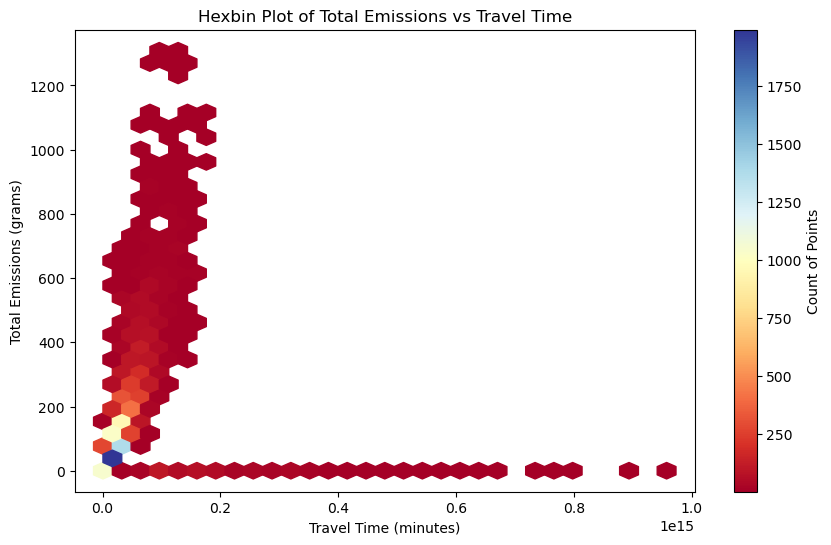

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

hb = plt.hexbin(trip_emissions["travel_time"], 
                trip_emissions["Total_emissions_KG"], 
                gridsize=30, 
                cmap="RdYlBu",
               mincnt=1,)

plt.colorbar(hb, label='Count of Points')
plt.xlabel("Travel Time (minutes)")
plt.ylabel("Total Emissions (grams)")
plt.title("Hexbin Plot of Total Emissions vs Travel Time")
plt.show()

In [98]:
# Create hexbin plot
plt.figure(figsize=(10, 6))

hb = plt.hexbin(
    trip_emissions["travel time (min)"], 
    trip_emissions["Total_Emissions_KG"], 
    gridsize=30, 
    cmap='Reds',
    mincnt=1  # Hide zero-count bins
)

plt.colorbar(hb, label='Count of Points')
plt.xlabel("Travel Time (minutes)")
plt.ylabel("Total Emissions (KG)")
plt.title("Hexbin Plot of Total Emissions vs Travel Time")
plt.show()


KeyError: 'travel time (min)'

<Figure size 1000x600 with 0 Axes>